In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
def compute_means(all_dfs, alg, metric):
    dfs = [v for k, v in all_dfs.items() if k.startswith(alg)]
    min_len = np.min([len(df) for df in dfs])
    trajectories = np.stack([df[metric].values[:min_len] for df in dfs])
    means = np.mean(trajectories, axis=0)
    return means

def compute_tops(all_dfs, alg, metric):
    dfs = [v for k, v in all_dfs.items() if k.startswith(alg)]
    min_len = np.min([len(df) for df in dfs])
    trajectories = np.stack([df[metric].values[:min_len] for df in dfs])
    tops = np.percentile(trajectories, q=80, axis=0)
    return tops

def compute_bottoms(all_dfs, alg, metric):
    dfs = [v for k, v in all_dfs.items() if k.startswith(alg)]
    min_len = np.min([len(df) for df in dfs])
    trajectories = np.stack([df[metric].values[:min_len] for df in dfs])
    bottoms = np.percentile(trajectories, q=20, axis=0)
    return bottoms

def find_best(all_dfs, alg, metric, chooser=np.argmax):
    dfs = [v for k, v in all_dfs.items() if k.startswith(alg)]
    min_len = np.min([len(df) for df in dfs])
    trajectories = np.stack([df[metric].values[:min_len] for df in dfs])
    means = np.mean(trajectories, axis=0)
    return chooser(means)

In [40]:
RESULT_PATH = '../sh_results/CASP12'
PLOTS_PATH = '../sh_plots/CASP12w'

RANKS_METRICS = [
    'z_score',
    'rank',
]

OTHER_METRICS = [
    'mse',
    'r2',
    'pearson',
    'spearman'
]

APPROACHES = [
    'global',
    'decoy'
]

SCORE_TYPES = [
    'global',
    'local'
]

# ALGORITHMS = [
#     's5_reg_drp_casp_8_11_25_v4.eval',
#     's5scoring_reg_drp_casp_8_11_25_v11.eval'
#     's5_5_casp_8_11_v',
#     's5_8_casp_8_11_v',
#     's5_10_casp_8_11_v',
#     's5dropout_10_casp_8_11_v',
#     's5_d0.1_reg0.001_o100_v1',
#     'nikita_best',
#     'nikita_base',
#     's5w_reg_drp_casp_8_11_25_v4',
#     's5w_reg_drp_casp_8_11_25_v5',
#     's5w_reg_drp_casp_8_11_25_v7'
#     's5_dropout_reg_10_casp_8_11_v'
# ]

ALGORITHMS = [
    alg
    for alg in os.listdir(RESULT_PATH)
    if alg.startswith('s5c_')
]


dfs = {
    alg: pd.read_csv(os.path.join(RESULT_PATH, alg))
    for alg in ALGORITHMS
}

In [41]:
ALGORITHMS

['s5c_d0.1_reg0.001_o25_v2.eval',
 's5c_d0.1_reg0.001_o25_v3.eval',
 's5c_d0.1_reg0.001_o25_v8.eval',
 's5c_d0.1_reg0.001_o25_v4.eval',
 's5c_d0.1_reg0.001_o25_v5.eval',
 's5c_d0.1_reg0.001_o25_v6.eval',
 's5c_d0.1_reg0.001_o25_v7.eval',
 's5c_d0.1_reg0.001_o25_v1.eval']

In [34]:
def plot_rank_metrics(dfs, path=None):
    fig1, axes = plt.subplots(1, 2, figsize=(18, 8))
    for i, metric in enumerate(RANKS_METRICS):
        for alg in ALGORITHMS:
            m = compute_means(dfs, alg, metric)
            t = compute_tops(dfs, alg, metric)
            b = compute_bottoms(dfs, alg, metric)
            axes[i].plot(m, label=alg)
#             axes[i].fill_between(np.arange(len(b)), b, t, alpha=0.2)
        axes[i].set_title(metric)
        axes[i].legend()
    plt.tight_layout()
    if path:
        plt.savefig(os.path.join(path, 'rank_metrics.png'))
    plt.show()
    
def plot_other_metrics(dfs, path=None):
    for metric in OTHER_METRICS:
        fig, axes = plt.subplots(2, 2, figsize=(18, 16))
        for i, score_type in enumerate(SCORE_TYPES):
            for j, approach in enumerate(APPROACHES):
                for alg in ALGORITHMS:
                    full_metric_name = '{}_{}_{}'.format(metric, score_type, approach)
                    m = compute_means(dfs, alg, full_metric_name)[1:]
                    t = compute_tops(dfs, alg, full_metric_name)[1:]
                    b = compute_bottoms(dfs, alg, full_metric_name)[1:]
                    axes[i][j].plot(m, label=alg)
                    axes[i][j].fill_between(np.arange(len(b)), b, t, alpha=0.2)
                axes[i][j].set_title(full_metric_name)
                axes[i][j].legend()
        plt.tight_layout()
        if path:
            plt.savefig(os.path.join(path, '{}.png'.format(metric)))
        plt.show()

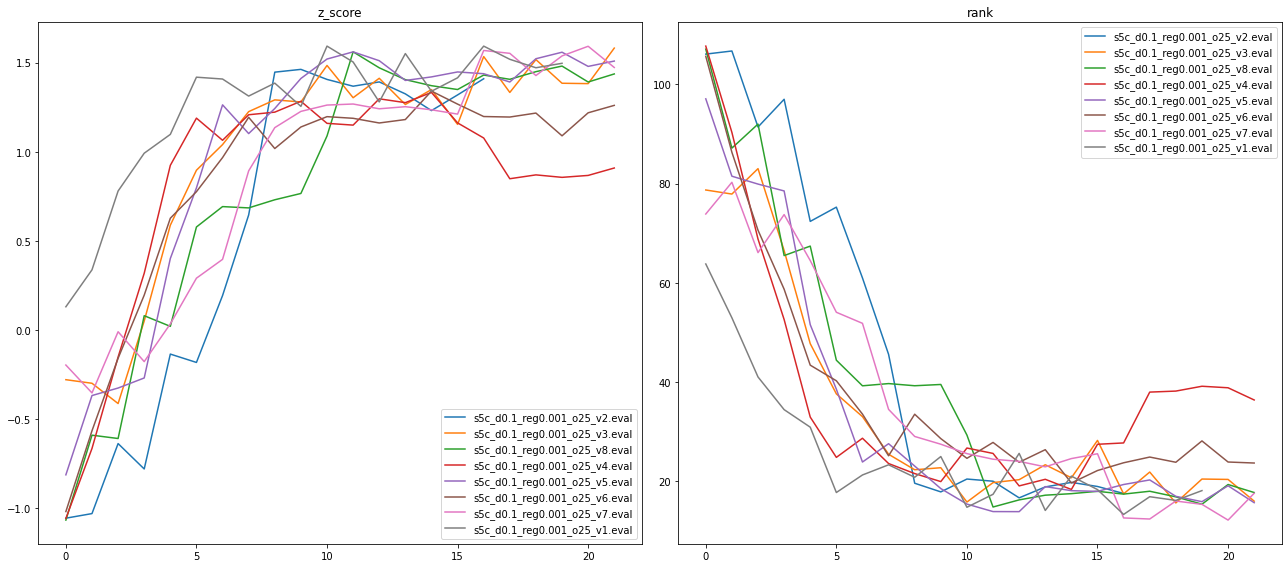

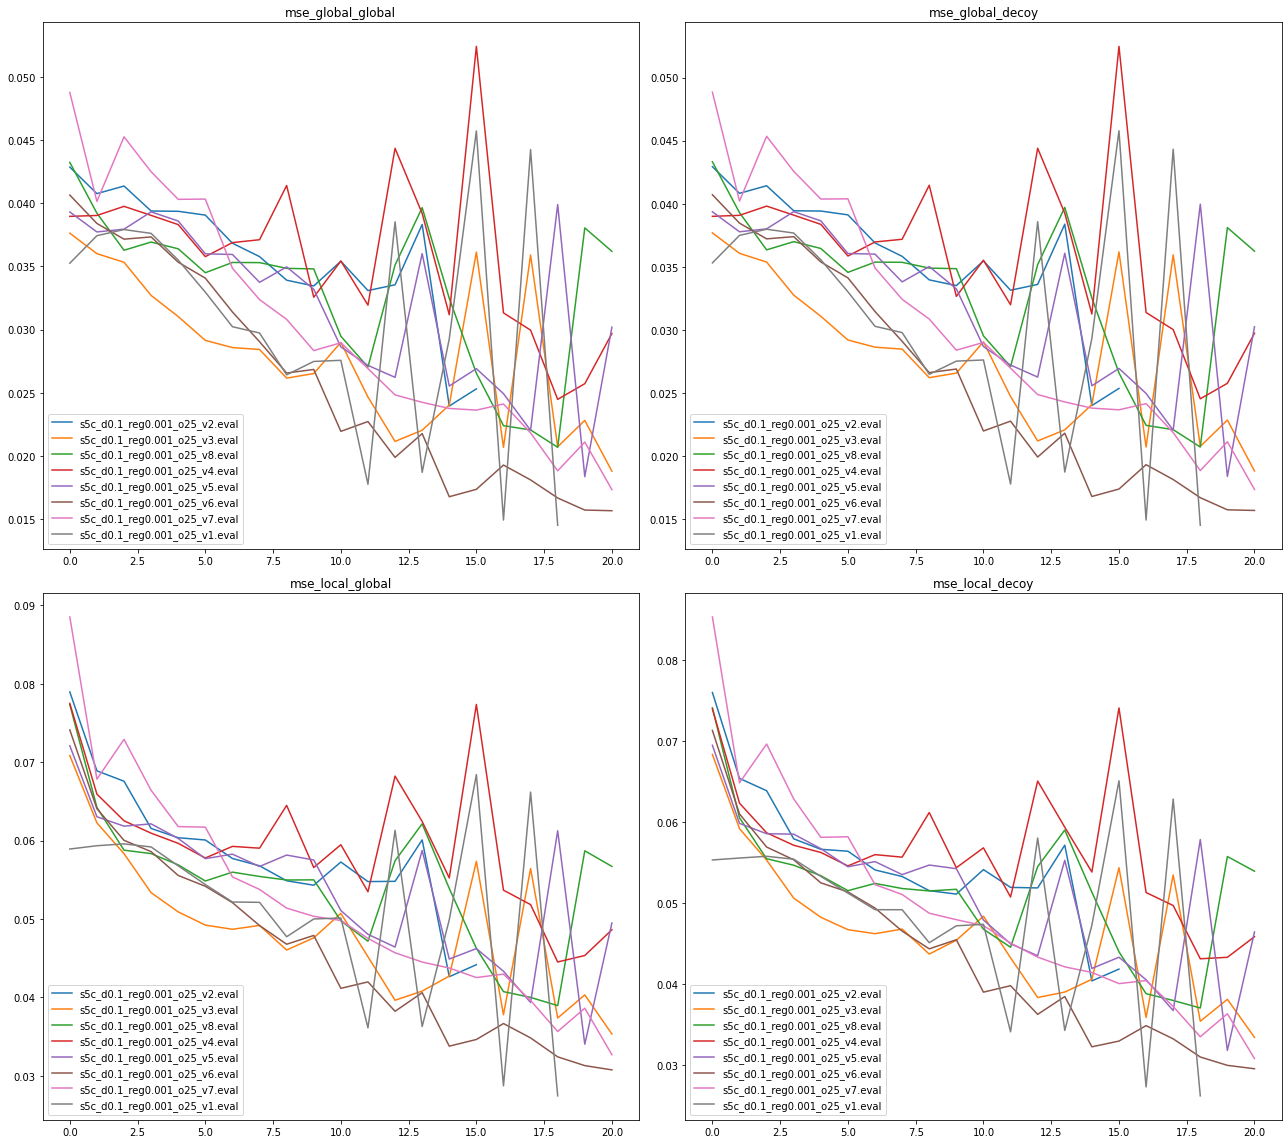

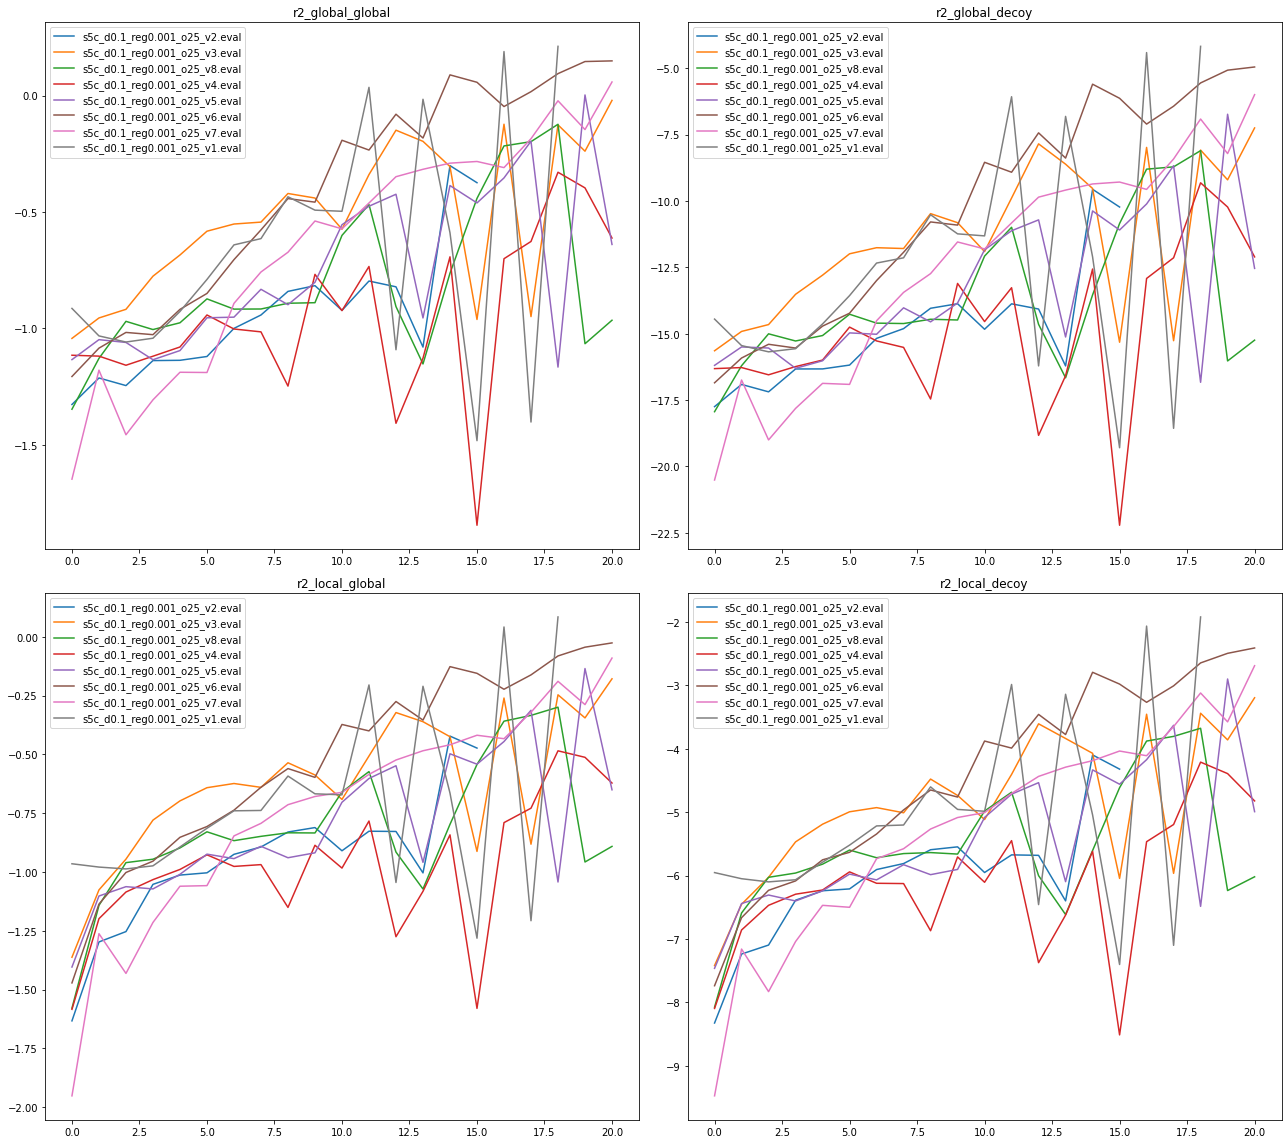

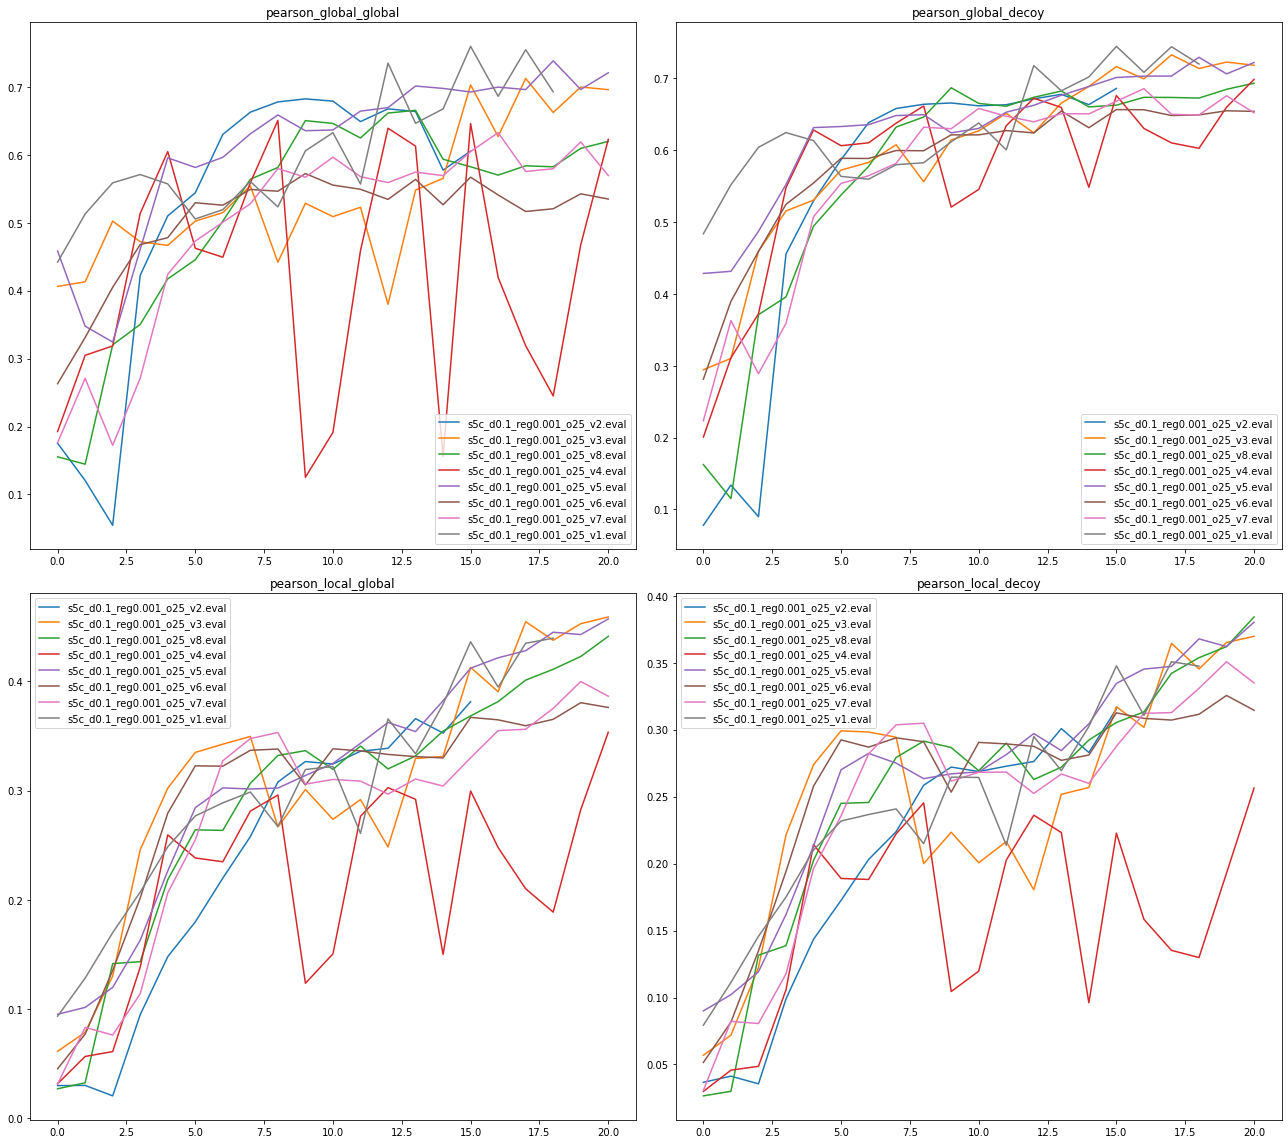

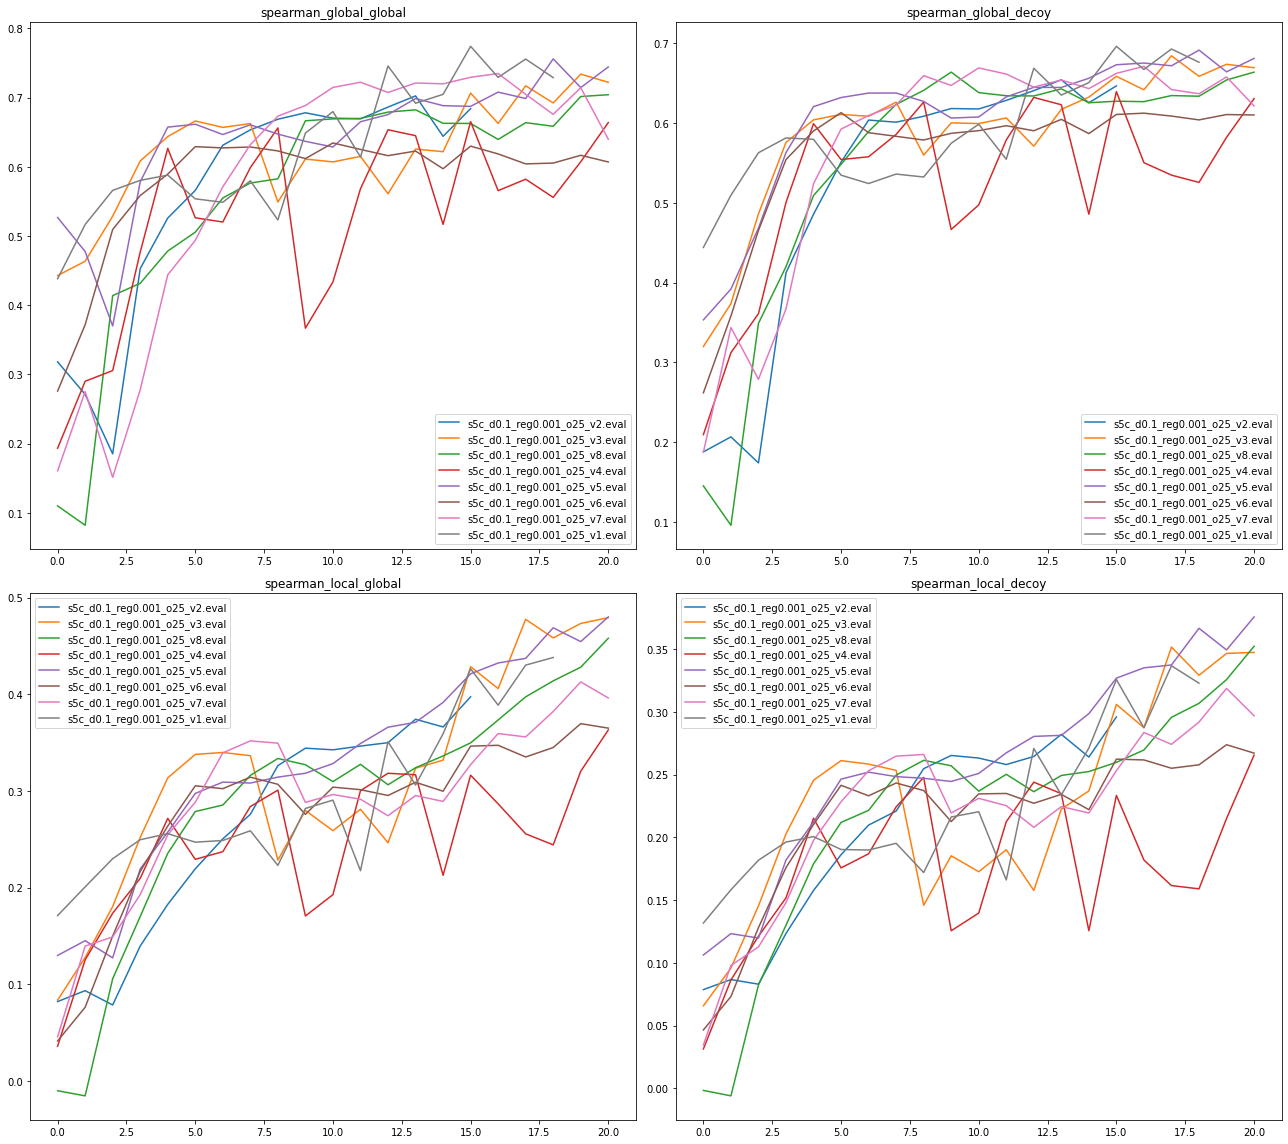

In [36]:
# plot_rank_metrics(dfs, path=PLOTS_PATH)
# plot_other_metrics(dfs, path=PLOTS_PATH)
plot_rank_metrics(dfs)
plot_other_metrics(dfs)

In [17]:
TABLE_METRICS_NAMES = [
    'z_score', 
    'rank', 
    'mse_global_global',
    'mse_global_decoy',
    'mse_local_global',
    'mse_local_decoy',
    'r2_global_global',
    'r2_global_decoy',
    'r2_local_global',
    'r2_local_decoy',
    'pearson_global_global',
    'pearson_global_decoy',
    'pearson_local_global',
    'pearson_local_decoy',
    'spearman_global_global',
    'spearman_global_decoy',
    'spearman_local_global',
    'spearman_local_decoy',
]

KEY_METRICS = 'pearson_local_global'

In [18]:
best2output = []
for alg in ALGORITHMS:
#     try:
    best_epoch = find_best(dfs, alg, KEY_METRICS, chooser=np.argmax)
#     except:
#         print(alg)
#         continue
    results = []
    for mname in TABLE_METRICS_NAMES:
        mres = compute_means(dfs, alg, mname)[best_epoch]
        results.append(mres)
    result = {
        'alg': alg,
        'best': best_epoch,
        'metric': results[12],
        'output': ','.join(map('{:.4f}'.format, results))
    }
    best2output.append(result)

In [19]:
best2output

[{'alg': 's5scoring_o10',
  'best': 28,
  'metric': 0.6450408581646465,
  'output': '1.4028,20.2051,0.0127,0.0127,0.0253,0.0246,0.3120,-4.4028,0.1563,-2.0526,0.8143,0.7401,0.6450,0.5017,0.8171,0.6865,0.6489,0.4845'}]

In [116]:
for output in sorted(best2output, key=lambda r: r['metric'], reverse=True):
    print(f"{output['alg']},{output['output']},epoch_{output['best']}")

s5w_reg_drp_casp_8_11_25_v5,1.4567,18.5000,0.0108,0.0107,0.0208,0.0200,0.4156,-2.5549,0.3060,-1.1861,0.8183,0.7896,0.6472,0.5127,0.8171,0.7354,0.6444,0.4930,epoch_37
s5w_reg_drp_casp_8_11_25_v4,1.5443,13.6923,0.0115,0.0114,0.0219,0.0209,0.3770,-2.9186,0.2683,-1.3190,0.8183,0.7949,0.6461,0.5168,0.8112,0.7441,0.6485,0.5009,epoch_39
s5w_reg_drp_casp_8_11_25_v7,1.3977,19.4103,0.0134,0.0133,0.0258,0.0244,0.2742,-3.6815,0.1383,-1.7031,0.7362,0.7262,0.4822,0.3782,0.7492,0.6634,0.4598,0.3477,epoch_39


In [14]:
best2output = []
for alg in ALGORITHMS:
    best_epoch = find_best(dfs, alg, KEY_METRICS, chooser=np.argmax)
    results = []
    for mname in TABLE_METRICS_NAMES:
        mres = compute_means(dfs, alg, mname)[best_epoch]
        results.append(mres)
    print(alg, best_epoch)
    print(','.join(map('{:.4f}'.format, results)))

s5w_reg_drp_casp_8_11_25_v4 29
1.0082,31.7179,0.0351,0.0351,0.1992,0.2023,-0.9057,-6.9519,-5.6405,-18.3320,0.6289,0.6050,0.2140,0.1352,0.6184,0.5522,0.1102,0.0535
s5w_reg_drp_casp_8_11_25_v5 8
0.5734,48.1026,0.0166,0.0166,0.0471,0.0438,0.0973,-5.0161,-0.5690,-3.7499,0.5838,0.5545,0.1514,0.1346,0.6224,0.4732,0.1762,0.1424
s5w_reg_drp_casp_8_11_25_v7 21
0.2918,58.0769,0.0235,0.0235,0.1457,0.1387,-0.2732,-9.0644,-3.8589,-13.8829,0.5621,0.4714,0.0956,0.0733,0.5504,0.3961,0.0967,0.0759


In [50]:
ALGORITHMS = [
    's5_d0.1_reg0.001_o100_v1',
    'nikita_best',
    'nikita_base'
]

CHECKPOINTS = [
    -1,
    0,
    0,
]

for alg, chkp in zip(ALGORITHMS, CHECKPOINTS):
    # best_epoch = find_best(dfs, alg, KEY_METRICS, chooser=np.argmax, until=15)
    results = []
    for mname in TABLE_METRICS_NAMES:
        mres = compute_means(dfs, alg, mname)[chkp]
        results.append(mres)
    print(alg)
    print(','.join(map('{:.4f}'.format, results)))

s5_d0.1_reg0.001_o100_v1
1.6488,12.9872,0.0055,0.0055,0.2949,0.2870,0.5516,-1.0259,0.0000,0.0000,0.8084,0.7071,nan,nan,0.7944,0.6811,nan,nan
nikita_best
1.6691,15.0128,0.0109,0.0108,0.3399,0.3359,0.1178,-2.2799,0.0000,0.0000,0.8478,0.7925,nan,nan,0.8345,0.7372,nan,nan
nikita_base
0.7942,39.4744,0.0215,0.0214,0.3737,0.3776,-0.7474,-5.6829,0.0000,0.0000,0.5108,0.6073,nan,nan,0.5115,0.5489,nan,nan


In [51]:
dfs['s5_d0.1_reg0.001_o100_v1']

,epoch,z_score,rank,mse_local_decoy,mse_local_global,mse_global_decoy,mse_global_global,r2_local_decoy,r2_local_global,r2_global_decoy,r2_global_global,pearson_local_decoy,pearson_local_global,pearson_global_decoy,pearson_global_global,spearman_local_decoy,spearman_local_global,spearman_global_decoy,spearman_global_global
0,checkpoint_epoch_52,1.648753,12.987179,0.286955,0.294886,0.005519,0.005527,0.0,0.0,-1.02591,0.551561,NaN,NaN,0.707149,0.808359,NaN,NaN,0.681062,0.794381


In [40]:
!git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://gitlab.inria.fr/grudinin/mg-learning
   ac600148..6c105712  pavlichenko -> origin/pavlichenko
Updating ac600148..6c105712
Fast-forward
 sh_results/CASP13_test/s5_d0.1_reg0.001_o100_v1.eval | 1 +
 1 file changed, 1 insertion(+)
